<a href="https://colab.research.google.com/github/Hanh42/AI---UEH-K50/blob/main/nh%C3%B3m%2011..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estimated Delivery Time: 15.0
Incentive Bonus: 5.0
Driver Performance Rating: 4.58


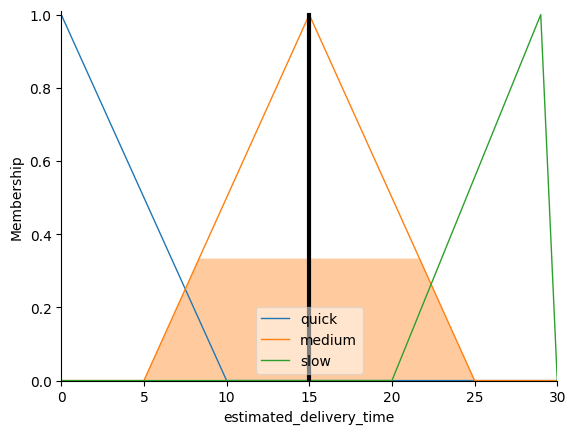

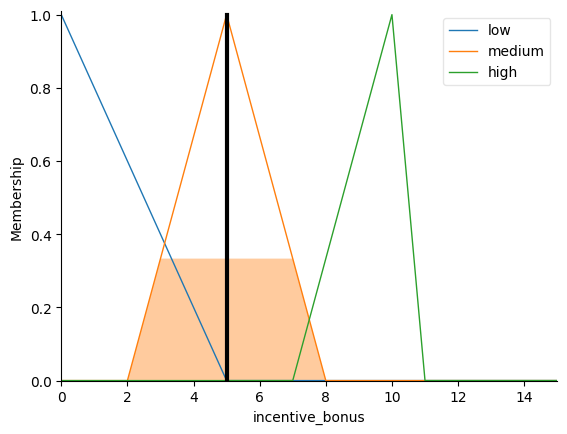

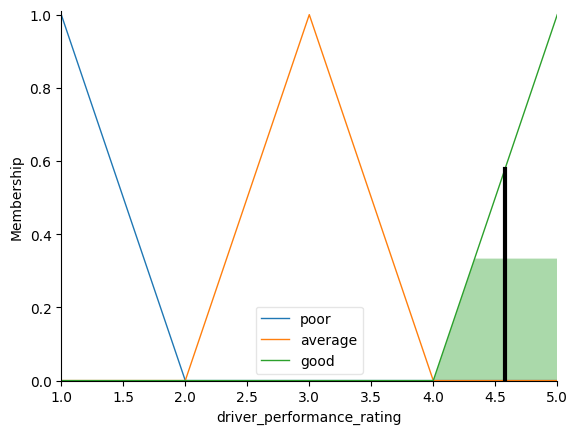

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 2. Khai báo biến
traffic_condition = ctrl.Antecedent(np.arange(0, 11, 1), 'traffic_condition')
distance_to_customer = ctrl.Antecedent(np.arange(0, 11, 1), 'distance_to_customer')
weather_condition = ctrl.Antecedent(np.arange(0, 11, 1), 'weather_condition')
order_preparation_time = ctrl.Antecedent(np.arange(0, 11, 1), 'order_preparation_time')
driver_fatigue_level = ctrl.Antecedent(np.arange(0, 11, 1), 'driver_fatigue_level')

estimated_delivery_time = ctrl.Consequent(np.arange(0, 31, 1), 'estimated_delivery_time')
incentive_bonus = ctrl.Consequent(np.arange(0, 16, 1), 'incentive_bonus')
driver_performance_rating = ctrl.Consequent(np.arange(1, 6, 1), 'driver_performance_rating')

# 3. Định nghĩa membership
traffic_condition['light'] = fuzz.trimf(traffic_condition.universe, [0, 0, 3])
traffic_condition['moderate'] = fuzz.trimf(traffic_condition.universe, [2, 5, 8])
traffic_condition['heavy'] = fuzz.trimf(traffic_condition.universe, [6, 8, 10])
traffic_condition['severe'] = fuzz.trimf(traffic_condition.universe, [9, 10, 10])

distance_to_customer['near'] = fuzz.trimf(distance_to_customer.universe, [0, 0, 3])
distance_to_customer['medium'] = fuzz.trimf(distance_to_customer.universe, [2, 5, 8])
distance_to_customer['far'] = fuzz.trimf(distance_to_customer.universe, [6, 8, 10])

weather_condition['good'] = fuzz.trimf(weather_condition.universe, [0, 0, 3])
weather_condition['fair'] = fuzz.trimf(weather_condition.universe, [2, 4, 6])
weather_condition['poor'] = fuzz.trimf(weather_condition.universe, [5, 7, 8.5])
weather_condition['severe'] = fuzz.trimf(weather_condition.universe, [8, 10, 10])

order_preparation_time['short'] = fuzz.trimf(order_preparation_time.universe, [0, 0, 3])
order_preparation_time['medium'] = fuzz.trimf(order_preparation_time.universe, [2, 5, 7])
order_preparation_time['long'] = fuzz.trimf(order_preparation_time.universe, [6, 8, 9])
order_preparation_time['very_long'] = fuzz.trimf(order_preparation_time.universe, [9, 10, 10])

driver_fatigue_level['fresh'] = fuzz.trimf(driver_fatigue_level.universe, [8, 10, 10])
driver_fatigue_level['slightly_tired'] = fuzz.trimf(driver_fatigue_level.universe, [5, 7, 8])
driver_fatigue_level['tired'] = fuzz.trimf(driver_fatigue_level.universe, [3, 4, 5])
driver_fatigue_level['exhausted'] = fuzz.trimf(driver_fatigue_level.universe, [0, 0, 3])

estimated_delivery_time['quick'] = fuzz.trimf(estimated_delivery_time.universe, [0, 0, 10])
estimated_delivery_time['medium'] = fuzz.trimf(estimated_delivery_time.universe, [5, 15, 25])
estimated_delivery_time['slow'] = fuzz.trimf(estimated_delivery_time.universe, [20, 29, 29])

incentive_bonus['low'] = fuzz.trimf(incentive_bonus.universe, [0, 0, 5])
incentive_bonus['medium'] = fuzz.trimf(incentive_bonus.universe, [2, 5, 8])
incentive_bonus['high'] = fuzz.trimf(incentive_bonus.universe, [7, 10, 10])

driver_performance_rating['poor'] = fuzz.trimf(driver_performance_rating.universe, [1, 1, 2])
driver_performance_rating['average'] = fuzz.trimf(driver_performance_rating.universe, [2, 3, 4])
driver_performance_rating['good'] = fuzz.trimf(driver_performance_rating.universe, [4, 5, 5])

# 4. Tạo rules (multi-output)
rule1 = ctrl.Rule(
    traffic_condition['light'] & distance_to_customer['near'] &
    weather_condition['good'] & order_preparation_time['short'] &
    driver_fatigue_level['fresh'],
    consequent=[estimated_delivery_time['quick'],
                incentive_bonus['high'],
                driver_performance_rating['good']]
)

rule2 = ctrl.Rule(
    traffic_condition['light'] & distance_to_customer['medium'] &
    weather_condition['good'],
    consequent=[estimated_delivery_time['medium'],
                incentive_bonus['medium'],
                driver_performance_rating['good']]
)

rule3 = ctrl.Rule(
    traffic_condition['light'] & distance_to_customer['far'] &
    weather_condition['fair'],
    consequent=[estimated_delivery_time['medium'],
                incentive_bonus['medium'],
                driver_performance_rating['average']]
)

rule4 = ctrl.Rule(
    traffic_condition['moderate'] & distance_to_customer['near'] &
    weather_condition['good'],
    consequent=[estimated_delivery_time['quick'],
                incentive_bonus['high'],
                driver_performance_rating['good']]
)

rule5 = ctrl.Rule(
    traffic_condition['moderate'] & distance_to_customer['far'] &
    (weather_condition['poor'] | weather_condition['severe']),
    consequent=[estimated_delivery_time['slow'],
                incentive_bonus['low'],
                driver_performance_rating['average']]
)

rule6 = ctrl.Rule(
    traffic_condition['heavy'] & distance_to_customer['near'] &
    (weather_condition['fair'] | weather_condition['poor']),
    consequent=[estimated_delivery_time['medium'],
                incentive_bonus['medium'],
                driver_performance_rating['average']]
)

rule7 = ctrl.Rule(
    traffic_condition['heavy'] & distance_to_customer['far'] &
    (weather_condition['poor'] | weather_condition['severe']),
    consequent=[estimated_delivery_time['slow'],
                incentive_bonus['low'],
                driver_performance_rating['poor']]
)

rule8 = ctrl.Rule(
    traffic_condition['severe'] & distance_to_customer['near'],
    consequent=[estimated_delivery_time['slow'],
                incentive_bonus['low'],
                driver_performance_rating['average']]
)

rule9 = ctrl.Rule(
    traffic_condition['severe'] & distance_to_customer['far'],
    consequent=[estimated_delivery_time['slow'],
                incentive_bonus['low'],
                driver_performance_rating['poor']]
)

rule10 = ctrl.Rule(
    (driver_fatigue_level['tired'] | driver_fatigue_level['exhausted']) &
    (weather_condition['poor'] | weather_condition['severe']),
    consequent=[estimated_delivery_time['slow'],
                incentive_bonus['low'],
                driver_performance_rating['poor']]
)

# Add more general rules to cover more input combinations
rule11 = ctrl.Rule(
    traffic_condition['moderate'] & distance_to_customer['medium'],
    consequent=[estimated_delivery_time['medium'],
                incentive_bonus['medium'],
                driver_performance_rating['average']]
)

rule12 = ctrl.Rule(
    weather_condition['fair'] & order_preparation_time['medium'],
    consequent=[estimated_delivery_time['medium'],
                incentive_bonus['medium'],
                driver_performance_rating['average']]
)

rule13 = ctrl.Rule(
    driver_fatigue_level['slightly_tired'] & traffic_condition['moderate'],
    consequent=[estimated_delivery_time['medium'],
                incentive_bonus['medium'],
                driver_performance_rating['average']]
)

# Added rules to specifically address the current input values
rule14 = ctrl.Rule(
    traffic_condition['light'] & distance_to_customer['medium'] &
    weather_condition['good'] & order_preparation_time['short'] &
    driver_fatigue_level['fresh'],
    consequent=[estimated_delivery_time['quick'],
                incentive_bonus['high'],
                driver_performance_rating['good']]
)

rule15 = ctrl.Rule(
    traffic_condition['light'] & distance_to_customer['medium'] &
    weather_condition['fair'] & order_preparation_time['short'] &
    driver_fatigue_level['fresh'],
    consequent=[estimated_delivery_time['medium'],
                incentive_bonus['medium'],
                driver_performance_rating['good']]
)

rule16 = ctrl.Rule(
    traffic_condition['light'] & distance_to_customer['medium'] &
    weather_condition['good'] & order_preparation_time['medium'] &
    driver_fatigue_level['fresh'],
    consequent=[estimated_delivery_time['medium'],
                incentive_bonus['medium'],
                driver_performance_rating['good']]
)

rule17 = ctrl.Rule(
    traffic_condition['light'] & distance_to_customer['medium'] &
    weather_condition['good'] & order_preparation_time['short'] &
    driver_fatigue_level['slightly_tired'],
    consequent=[estimated_delivery_time['quick'],
                incentive_bonus['high'],
                driver_performance_rating['good']]
)


# 5. Tạo hệ thống & mô phỏng
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17])
sim = ctrl.ControlSystemSimulation(system)

# Gán giá trị đầu vào
sim.input['traffic_condition'] = 2
sim.input['distance_to_customer'] = 4
sim.input['weather_condition'] = 3
sim.input['order_preparation_time'] = 2
sim.input['driver_fatigue_level'] = 9

# Chạy mô phỏng
sim.compute()

# 6. In kết quả
print("Estimated Delivery Time:", round(sim.output['estimated_delivery_time'], 2))
print("Incentive Bonus:", round(sim.output['incentive_bonus'], 2))
print("Driver Performance Rating:", round(sim.output['driver_performance_rating'], 2))

# 7. Vẽ biểu đồ kết quả
estimated_delivery_time.view(sim=sim)
incentive_bonus.view(sim=sim)
driver_performance_rating.view(sim=sim)
plt.show()